In [3]:
import pandas as pd #type: ignore
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore

In [4]:
data=pd.read_csv('climate_action_data.csv')




In [5]:
data.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [6]:
data.columns

Index(['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
       'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)',
       'Irrigation_Recommended(mm)', 'Drone_Image_ID'],
      dtype='object')

In [9]:
len(data)
 

913

In [15]:
data.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [ ]:
data['Date'] = data['Date'].fillna("No Date")

In [18]:
data['Crop_Type'] = data['Crop_Type'].fillna("Unknown")

In [19]:
data.isnull().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [10]:
data.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [20]:
data.dtypes


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [6]:
cols_to_convert = [
    'Soil_Moisture(%)', 
    'Soil_pH', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Fertilizer_Recommended(kg/ha)', 
    'Irrigation_Recommended(mm)'
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [22]:
data.dtypes

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [7]:
data['Soil_Moisture(%)'].mean()

np.float64(44.47009911894272)

In [9]:
data['Crop_Type'].value_counts()

Crop_Type
Wheat       203
Tomatoes    187
Beans       176
Lettuce     172
Maize       171
Name: count, dtype: int64

In [10]:
data.groupby('Crop_Type')['Fertilizer_Recommended(kg/ha)'].mean()

Crop_Type
Beans       84.774286
Lettuce     88.426316
Maize       88.451176
Tomatoes    89.303763
Wheat       86.853960
Name: Fertilizer_Recommended(kg/ha), dtype: float64

In [11]:
#tempeture range
data['Temperature(C)'].min(), data['Temperature(C)'].max()

(np.float64(18.0), np.float64(35.0))

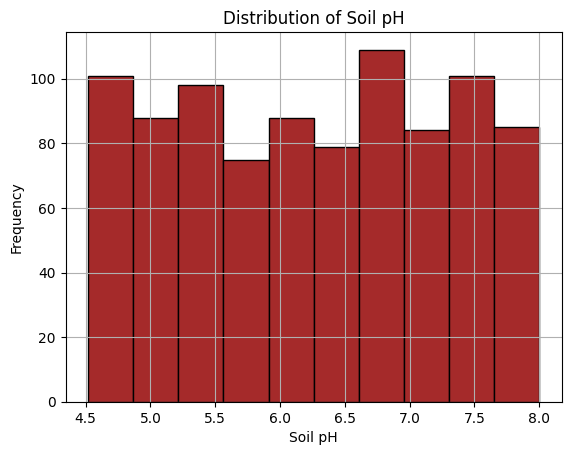

<Figure size 640x480 with 0 Axes>

In [21]:
#Histogram of Soil pH
import matplotlib.pyplot as plt
plt.hist(data['Soil_pH'], bins=10, color='brown', edgecolor='black')
plt.title('Distribution of Soil pH')
plt.xlabel('Soil pH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.savefig("bar_chart.png")


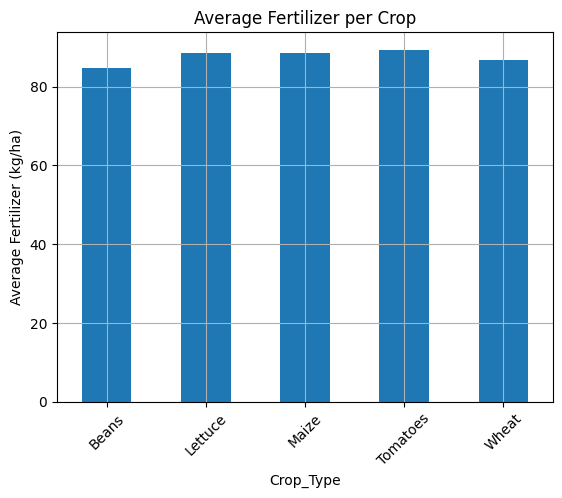

<Figure size 640x480 with 0 Axes>

In [23]:
#bar cahrt of Avg Fertilizer by crop
data.groupby('Crop_Type')['Fertilizer_Recommended(kg/ha)'].mean().plot(kind='bar')
plt.title('Average Fertilizer per Crop')
plt.xlabel('Crop_Type')
plt.ylabel('Average Fertilizer (kg/ha)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig("fertilizerbar_chart.png")


In [ ]:
#pie chart of crop types

crop_counts = data['Crop_Type'].value_counts()


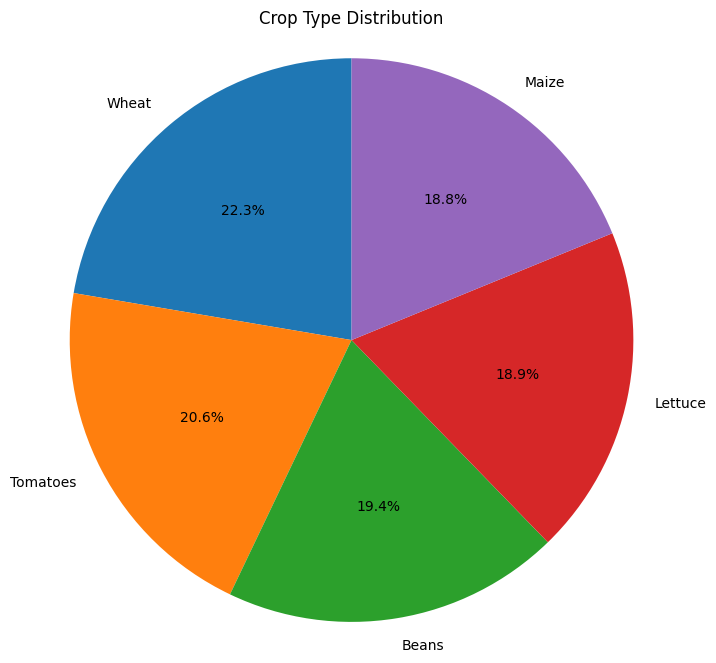

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Crop Type Distribution')
plt.axis('equal')  # Makes it a perfect circle
plt.show()
plt.savefig("pie_chart.png")

